In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df = pd.read_csv("Investment_df_cleaned.csv.csv")

In [3]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,0,operating,USA,IL,"Springfield, Illinois",...,0,0,0,0,0,0,0,0,0,0
2,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,|Health and Wellness|,Health and Wellness,0,operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
3,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,|Health and Wellness|,Health and Wellness,1750000,operating,USA,NJ,Newark,...,0,0,0,0,0,0,0,0,0,0
4,/organization/10-20-media,10-20 Media,http://www.10-20media.com,|E-Commerce|,E-Commerce,2050000,operating,USA,MD,Baltimore,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns 

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')

In [10]:
# Converting Columns in date and time formate 

date_columns = ['founded_at', 'first_funding_at', 'last_funding_at','founded_year']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


# Growth analysis

- Analyzing companies that secured multiple rounds.

- Examine the time-line of funding and fast growing companies 

In [12]:
multi_round_companies = df[df['funding_rounds'] > 1]

In [14]:
# Calculating funding duration in days

df['funding_duration'] = (
    df['last_funding_at'] - df['first_funding_at']
).dt.days

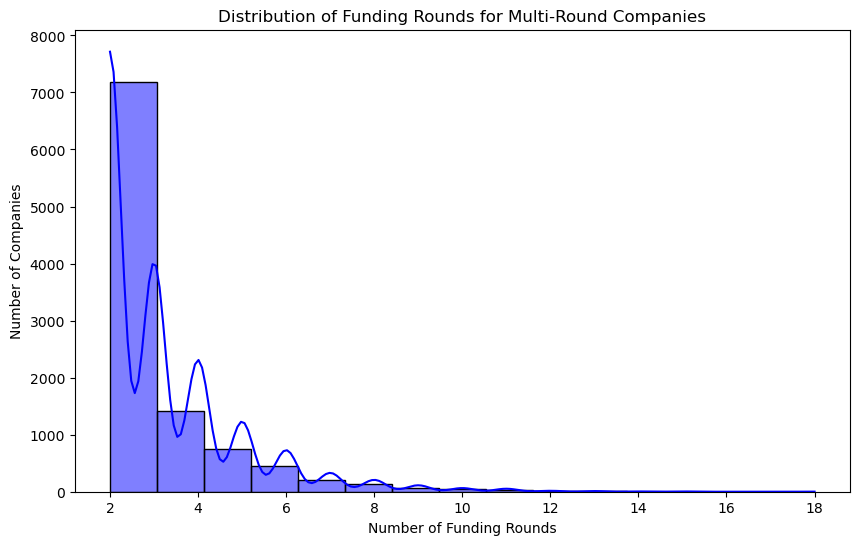

In [18]:
#1
# Distribution of Funding Rounds

plt.figure(figsize=(10, 6))
sns.histplot(multi_round_companies['funding_rounds'], bins=15, kde=True, color='blue')
plt.title("Distribution of Funding Rounds for Multi-Round Companies")
plt.xlabel("Number of Funding Rounds")
plt.ylabel("Number of Companies")
plt.show()

In [100]:
# Calculating funding duration in days

df['funding_duration'] = (
    df['last_funding_at'] - df['first_funding_at']
).dt.days

In [102]:
# Identifing fast growing companies

fast_growing_companies = df[
    (df['funding_rounds'] >= 3) & (df['funding_duration'] <= 730)  
]
fast_growing_companies

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,funding_duration
15,/organization/121nexus,121nexus,http://www.121nexus.com,|Politics|Technology|Medical Devices|Pharmaceu...,Pharmaceuticals,794000,operating,USA,RI,Providence,...,0,0,0,0,0,0,0,0,0,695.0
74,/organization/3d-robotics,3D Robotics,http://3drobotics.com,|Drones|Manufacturing|,Drones,35000000,operating,USA,CA,San Diego,...,0,5000000,30000000,0,0,0,0,0,0,680.0
76,/organization/3d-systems,3D Systems,http://www.3dsystems.com,|Software|,Software,169500000,operating,USA,SC,SC - Other,...,0,0,0,0,0,0,0,0,0,271.0
86,/organization/3play-media,3Play Media,http://www.3playmedia.com,|Software|,Software,1011601,operating,USA,MA,Boston,...,0,0,0,0,0,0,0,0,0,620.0
87,/organization/3scan,3Scan,http://www.3scan.com,|Biotechnology|,Biotechnology,390000,operating,USA,CA,SF Bay Area,...,0,0,0,0,0,0,0,0,0,685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21762,/organization/zoobean,Zoobean,http://www.zoobean.com,|Curated Web|,Curated Web,1242619,operating,USA,VA,"Washington, D.C.",...,0,0,0,0,0,0,0,0,0,316.0
21770,/organization/zoomdata,Zoomdata,http://www.zoomdata.com,|Data Visualization|Big Data Analytics|Analytics|,Big Data Analytics,22200000,operating,USA,VA,"Washington, D.C.",...,0,4100000,17000000,0,0,0,0,0,0,692.0
21800,/organization/zula,Zula,http://www.zulaapp.com,|Mobile|,Mobile,4000000,operating,USA,NY,New York City,...,0,3000000,0,0,0,0,0,0,0,385.0
21803,/organization/zuldi,Zuldi,http://www.zuldi.co/,|Nightclubs|iPod Touch|iPad|Payments|Startups|...,Nightclubs,80000,operating,USA,NV,Las Vegas,...,0,0,0,0,0,0,0,0,0,427.0


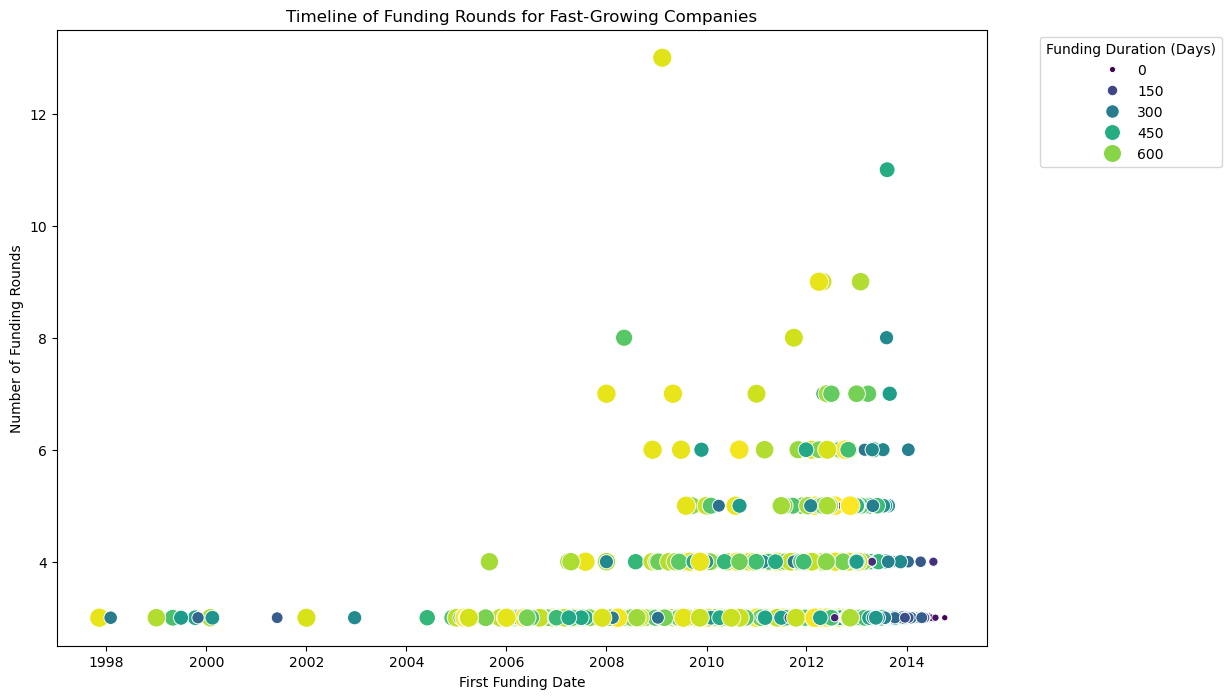

In [20]:
#2
#  Funding Timeline for Fast-Growing Companies
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=fast_growing_companies['first_funding_at'],
    y=fast_growing_companies['funding_rounds'],
    size=fast_growing_companies['funding_duration'],
    hue=fast_growing_companies['funding_duration'],
    palette="viridis",
    sizes=(20, 200),
    legend="brief",
)
plt.title("Timeline of Funding Rounds for Fast-Growing Companies")
plt.xlabel("First Funding Date")
plt.ylabel("Number of Funding Rounds")
plt.legend(title="Funding Duration (Days)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Leader of each Market segment

In [23]:
df.groupby(["market","name"])[["funding_total_usd","status"]].sum().head(10)

funding_total_usd     status
market      name                                                       
3D          3D Industri.es                           1200000  operating
            Accompani                               20600000  operating
            CADsurf                                    40000  operating
            Fyusion                                  3350000  operating
            Hyperfair                                2800000  operating
            Mobile Media Content                      947228  operating
            Surgical Theater                          525000  operating
            Xooker                                    900000  operating
3D Printing Formlabs                                22300000  operating
            Mixed Dimensions Inc. (MXD3D)            2628000  operating

In [91]:
top_10 = df.groupby(["market", "name","status"])[["funding_total_usd"]].sum().reset_index()

# Take the top 10 companies with highest funding
top_10 = top_10.sort_values('funding_total_usd', ascending=False).head(10)

top_10

,market,name,status,funding_total_usd
14167,Mobile,Verizon Communications,operating,30079503000
11943,Internet,Clearwire,acquired,5700000000
20856,Trading,First Data Corporation,operating,3500000000
11441,Health and Wellness,sigmacare,operating,2600000000
4361,Communities,Facebook,operating,2425700000
1934,Biotechnology,Carestream,operating,2400000000
8079,Enterprise Software,Zebra Technologies,operating,2000000000
12372,Local Businesses,Quad/Graphics,operating,1900000000
12735,Manufacturing,Solyndra,closed,1567504319
20952,Transportation,Uber,operating,1507450000


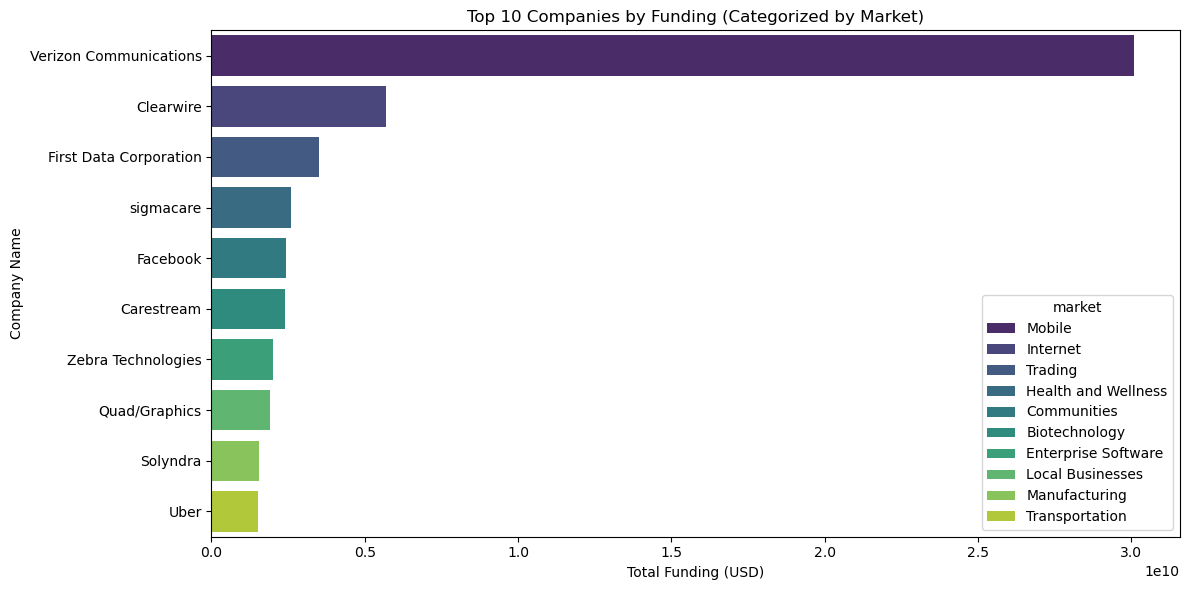

In [25]:

#3

# Group data
top_10 = df.groupby(["market", "name","status"])[["funding_total_usd"]].sum().reset_index()

# Take the top 10 companies with highest funding
top_10 = top_10.sort_values('funding_total_usd', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='funding_total_usd', y='name', hue='market', data=top_10, palette='viridis')

plt.title('Top 10 Companies by Funding (Categorized by Market)')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()


In [27]:
df.groupby(["market","status"])["name"].count()

market         status   
3D             operating     8
3D Printing    operating     2
3D Technology  operating     3
Accounting     acquired      2
               operating     7
                            ..
iPhone         closed        6
               operating    23
iPod Touch     acquired      1
               operating     2
mHealth        operating     1
Name: name, Length: 1158, dtype: int64

# Investor Signal

- Which market segment is booming with money flow.

- Which companies recently(eg . 6 months or less) recevied the funding.

In [196]:
df.groupby(["market"])["funding_total_usd"].sum().head(10)

market
3D                         30362228
3D Printing                24928000
3D Technology              10600000
Accounting                282249531
Ad Targeting               80301943
Advanced Materials                0
Adventure Travel            1415000
Advertising              9266354840
Advertising Exchanges      75511200
Advertising Networks        7500000
Name: funding_total_usd, dtype: int64

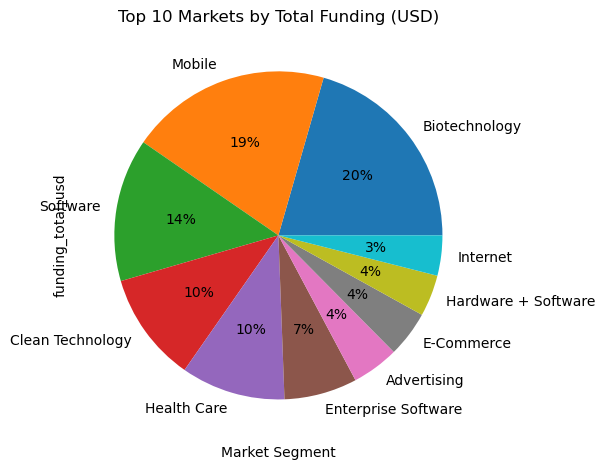

In [98]:
#4
# Group by 'market' and sum the 'funding_total_usd', then get the top 1
top_10_markets = df.groupby("market")["funding_total_usd"].sum().nlargest(10)

# Plot the results
top_10_markets.plot(kind="pie", autopct = "%d%%")
plt.title('Top 10 Markets by Total Funding (USD)')
plt.xlabel('Market Segment')
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

Custom current date: 2014-12-31 00:00:00
Cutoff date (last 6 months from 2014): 2014-06-30 00:00:00


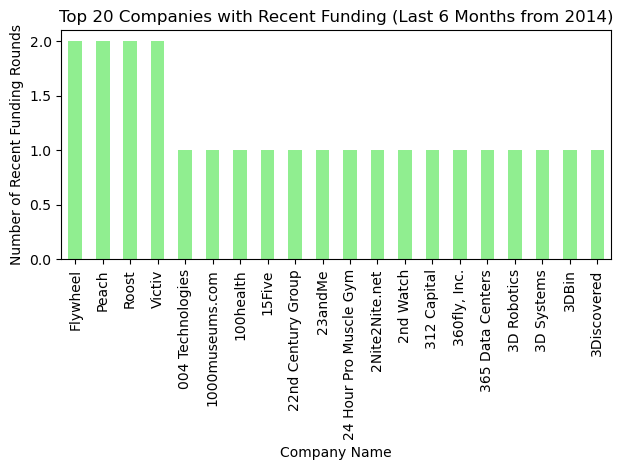

In [19]:
#5
# Set a custom "current date" based on your data range 
current_date = pd.to_datetime('2014-12-31')

# Calculate the cutoff date for recent funding (last 6 months from the current date)
cutoff_date = current_date - pd.DateOffset(months=6)

# Print the custom current date and the cutoff date for verification
print(f"Custom current date: {current_date}")
print(f"Cutoff date (last 6 months from 2014): {cutoff_date}")

# Assuming 'last_funding_at' is the column containing the funding dates
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

# Filter for companies that received funding in the last 6 months from the custom date
recent_funding_companies = df[df['last_funding_at'] > cutoff_date]

# Check if there are any recent funding companies
if recent_funding_companies.empty:
    print("No companies received recent funding within the last 6 months.")
else:
    # Group by company name and count the number of recent funding events
    recent_funding_count = recent_funding_companies.groupby("name")["last_funding_at"].count().nlargest(20)

    # Visualize the top 20 companies with recent funding
    recent_funding_count.plot(kind="bar", color='lightgreen')
    plt.title('Top 20 Companies with Recent Funding (Last 6 Months from 2014)')
    plt.xlabel('Company Name')
    plt.ylabel('Number of Recent Funding Rounds')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to avoid label overlap
    plt.show()

# Risk analysis

In [70]:
closed_companies = df[df['status'] == 'closed']

# Find companies with above-average funding
above_avg_funding = closed_companies.groupby('name').filter(
    lambda x: x['funding_total_usd'].mean() > df['funding_total_usd'].mean()
)

# Reset index for cleaned data
filtered_data = above_avg_funding.reset_index(drop=True)
filtered_data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,funding_duration
0,/organization/aerovance,Aerovance,http://www.aerovance.com,|Biotechnology|,Biotechnology,120500000,closed,USA,CA,CA - Other,...,0,0,0,60000000,0,0,0,0,0,1454.0
1,/organization/alice-com,Alice.com,http://www.alice.com,|E-Commerce|,E-Commerce,27890167,closed,USA,WI,Madison,...,0,18227665,0,0,0,0,0,0,0,785.0
2,/organization/alloptic,Alloptic,http://www.alloptic.com,|Public Relations|,Public Relations,38000000,closed,USA,CA,SF Bay Area,...,0,0,0,0,0,30000000,0,0,0,303.0
3,/organization/anagran-inc,Anagran,http://www.anagran.com,|Web Hosting|,Web Hosting,22600000,closed,USA,CA,SF Bay Area,...,0,0,14000000,0,8600000,0,0,0,0,1034.0
4,/organization/anaphore,Anaphore,http://www.anaphoreinc.com,|Biotechnology|,Biotechnology,24300000,closed,USA,CA,San Diego,...,0,13000000,0,0,0,0,0,0,0,495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,/organization/zango,Zango,http://zango.com,|Video|Games|,Games,40000000,closed,USA,WA,Seattle,...,0,40000000,0,0,0,0,0,0,0,822.0
114,/organization/zeo,Zeo,http://www.myZeo.com,|Analytics|,Analytics,27138500,closed,USA,MA,Boston,...,0,0,0,20638500,0,0,0,0,0,870.0
115,/organization/zettacore,ZettaCore,http://zettacore.com/index.html,|Semiconductors|,Semiconductors,21000000,closed,USA,CO,Denver,...,0,0,0,0,0,0,0,0,0,0.0
116,/organization/zeugma-systems,Zeugma Systems,http://www.zeugmasystems.com,|Web Hosting|,Web Hosting,31500000,closed,CAN,ON,Toronto,...,0,0,22500000,9000000,0,0,0,0,0,472.0


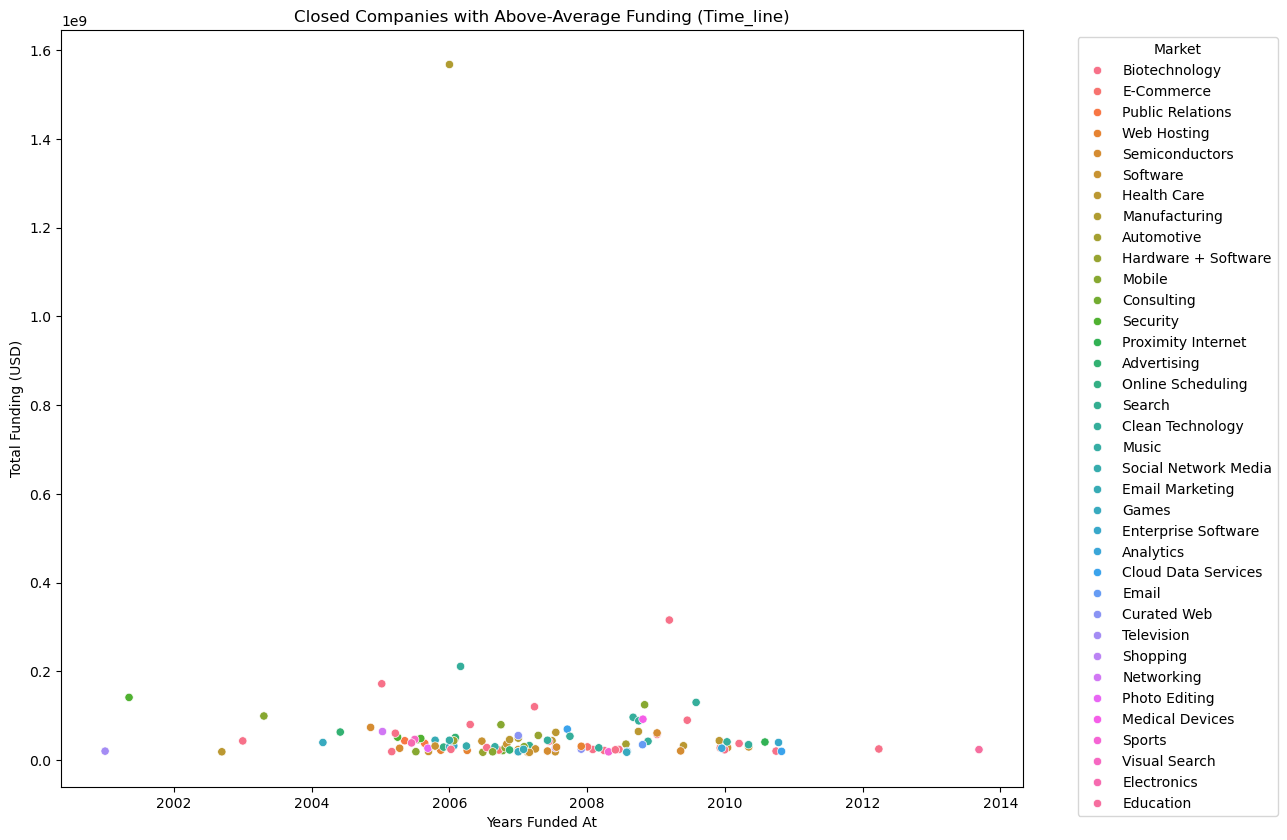

In [172]:
#6
# Filter closed companies and compute above-average funding
closed_companies = df[df['status'] == 'closed']

# Find companies with above-average funding
above_avg_funding = closed_companies.groupby('name').filter(
    lambda x: x['funding_total_usd'].mean() > df['funding_total_usd'].mean()
)

# Reset index for cleaned data
filtered_data = above_avg_funding.reset_index(drop=True)

# Closed Companies with Above-Average Funding (Time_line)
plt.figure(figsize=(13, 9))
sns.scatterplot(
    data=filtered_data,
    x="first_funding_at",
    y="funding_total_usd",
    hue="market",      
    sizes=(10, 20)
)
plt.title("Closed Companies with Above-Average Funding (Time_line)")
plt.xlabel("Years Funded At")
plt.ylabel("Total Funding (USD)")
plt.legend(title="Market", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

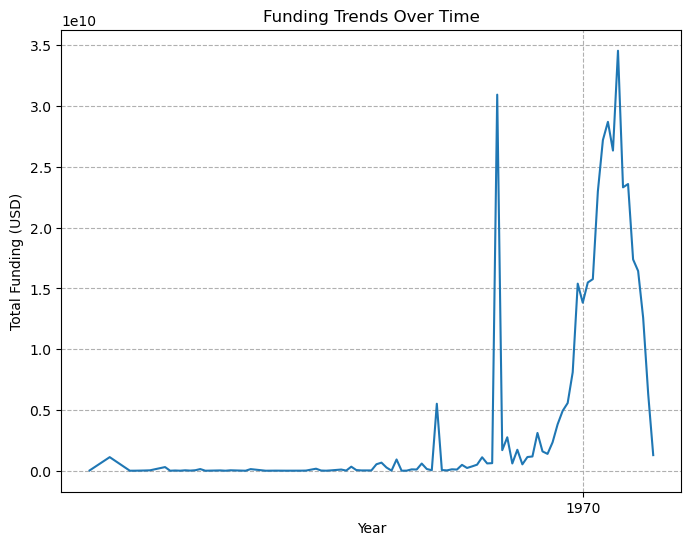

In [85]:
#
funding_by_year = df.groupby('founded_year')['funding_total_usd'].sum().reset_index()

plt.figure(figsize = (8, 6))
plt.plot(funding_by_year['founded_year'], funding_by_year['funding_total_usd'])

plt.title('Funding Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True, linestyle = '--')